<a href="https://colab.research.google.com/github/hariPrasadCoder/Onion-price-forecasting-and-supply-chain-analytics/blob/main/Onion_price_forecasting_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ONION PRICE FORECASTING USING ARIMA MODEL:

## Importing necessary basic libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt

## Reading the dataset:

In [ ]:
df = pd.read_excel('MonthWiseMarketArrivals_Chennai.xlsx')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod
0,CHENNAI,January,2004,103400,798,1019,910
1,CHENNAI,February,2004,87800,776,969,873
2,CHENNAI,March,2004,102180,506,656,580
3,CHENNAI,April,2004,83300,448,599,527
4,CHENNAI,May,2004,84850,462,596,529


In [ ]:
df = df[['month','year','priceMod']]
df.head()

,month,year,priceMod
0,January,2004,910
1,February,2004,873
2,March,2004,580
3,April,2004,527
4,May,2004,529


## Combining "month" and "year" columns:

In [ ]:
df['date'] = df['month'] + '-' + df['year'].map(str)
df.head()

,month,year,priceMod,date
0,January,2004,910,January-2004
1,February,2004,873,February-2004
2,March,2004,580,March-2004
3,April,2004,527,April-2004
4,May,2004,529,May-2004


In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.head()

,month,year,priceMod,date
0,January,2004,910,2004-01-01
1,February,2004,873,2004-02-01
2,March,2004,580,2004-03-01
3,April,2004,527,2004-04-01
4,May,2004,529,2004-05-01


## Considering only the "date" and "Price" features for further steps:

In [ ]:
df = df[['date','priceMod']]
df.head()

,date,priceMod
0,2004-01-01,910
1,2004-02-01,873
2,2004-03-01,580
3,2004-04-01,527
4,2004-05-01,529


## Setting the "date" column as an index:

In [ ]:
df = df.set_index('date')

In [ ]:
df.head()

,priceMod
date,
2004-01-01,910
2004-02-01,873
2004-03-01,580
2004-04-01,527
2004-05-01,529


## Converting DataFrame to Series:

In [ ]:
df = df.squeeze()
df

date
2004-01-01     910
2004-02-01     873
2004-03-01     580
2004-04-01     527
2004-05-01     529
              ... 
2021-01-01    2976
2021-02-01    4211
2021-03-01    3300
2021-04-01    1100
2021-05-01    1150
Name: priceMod, Length: 209, dtype: int64

## Splitting the dataset to train and validation, and saving it as separate csv files:

In [ ]:
split_point = len(df) - 5
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('onion_dataset_final.csv', header=False)
validation.to_csv('onion_validation.csv', header=False)

Dataset 204, Validation 5


## Fitting the model using a baseline model called "Persistence model":

In [ ]:
# evaluate a persistence model
series = pd.read_csv('onion_dataset_final.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  yhat = history[-1]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=887.000, Expected=1038.000
>Predicted=1038.000, Expected=1143.000
>Predicted=1143.000, Expected=1123.000
>Predicted=1123.000, Expected=1269.000
>Predicted=1269.000, Expected=1921.000
>Predicted=1921.000, Expected=1910.000
>Predicted=1910.000, Expected=1964.000
>Predicted=1964.000, Expected=2033.000
>Predicted=2033.000, Expected=1518.000
>Predicted=1518.000, Expected=1410.000
>Predicted=1410.000, Expected=1431.000
>Predicted=1431.000, Expected=1850.000
>Predicted=1850.000, Expected=2756.000
>Predicted=2756.000, Expected=4530.000
>Predicted=4530.000, Expected=5217.000
>Predicted=5217.000, Expected=4676.000
>Predicted=4676.000, Expected=4705.000
>Predicted=4705.000, Expected=2609.000
>Predicted=2609.000, Expected=1477.000
>Predicted=1477.000, Expected=1300.000
>Predicted=1300.000, Expected=1288.000
>Predicted=1288.000, Expected=1320.000
>Predicted=1320.000, Expected=1640.000
>Predicted=1640.000, Expected=2288.000
>Predicted=2288.000, Expected=2981.000
>Predicted=2981.000, Expec

We got a RMSE value of 924.774 using the baseline model. So, our other models must be definitely better than this.

In [ ]:
series.describe()

count     204.000000
mean     1621.764706
std      1236.655108
min       384.000000
25%       878.750000
50%      1263.000000
75%      1953.500000
max      9876.000000
Name: 1, dtype: float64

## Visualizing our data:

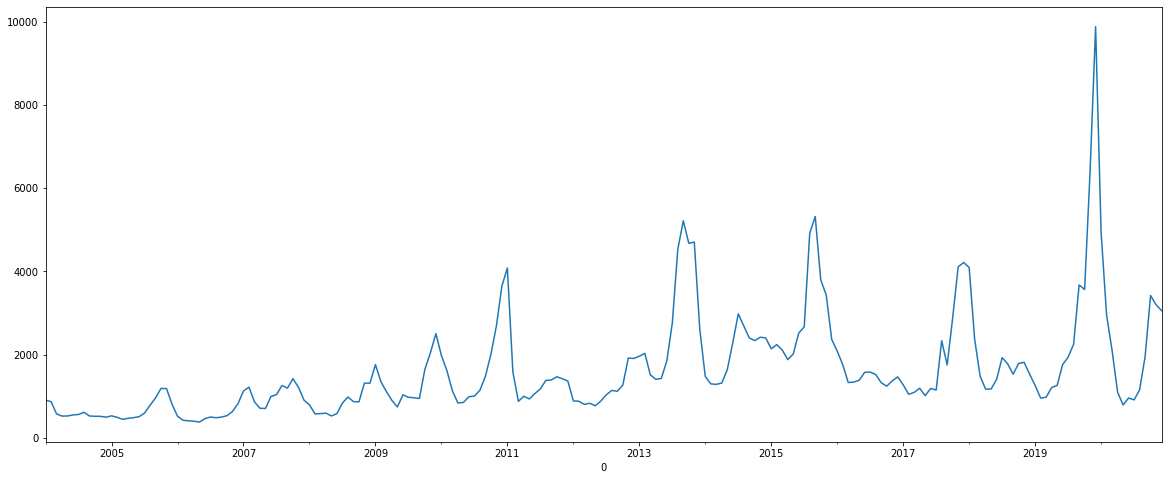

In [ ]:
plt.figure(figsize=(20,8))
series.plot()

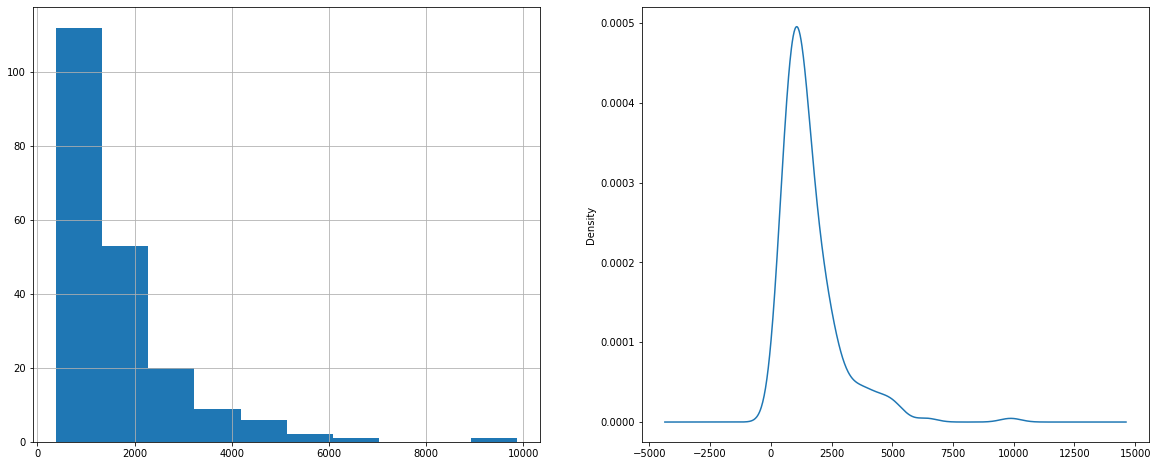

In [ ]:
plt.figure(figsize=(20,8))
plt.figure(1)
plt.subplot(121)
series.hist()
plt.subplot(122)
series.plot(kind='kde')

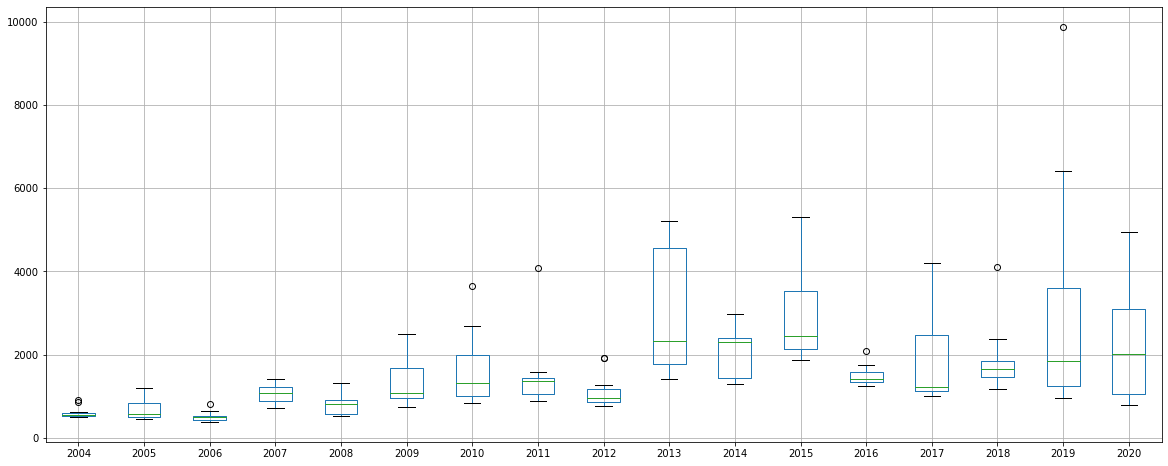

In [ ]:
groups = series['2004':'2020'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
plt.figure(figsize=(20,8))
years.boxplot()

## ADF test:

In [ ]:
from statsmodels.tsa.stattools import adfuller

def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i - 1]
    diff.append(value)
  return pd.Series(diff)

# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv', header=False)

ADF Statistic: -7.901252
p-value: 0.000000
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


ADF (Augmented Dicky Fuller) statistic is -7.9 which is less than 1% critical value. So, we can reject the null hypothesis and accept the alternate hypothesis (which is the data is stationary, by performing 1 differencing)

## Plotting Autocorrelation and Partial Autocorrelation plots:

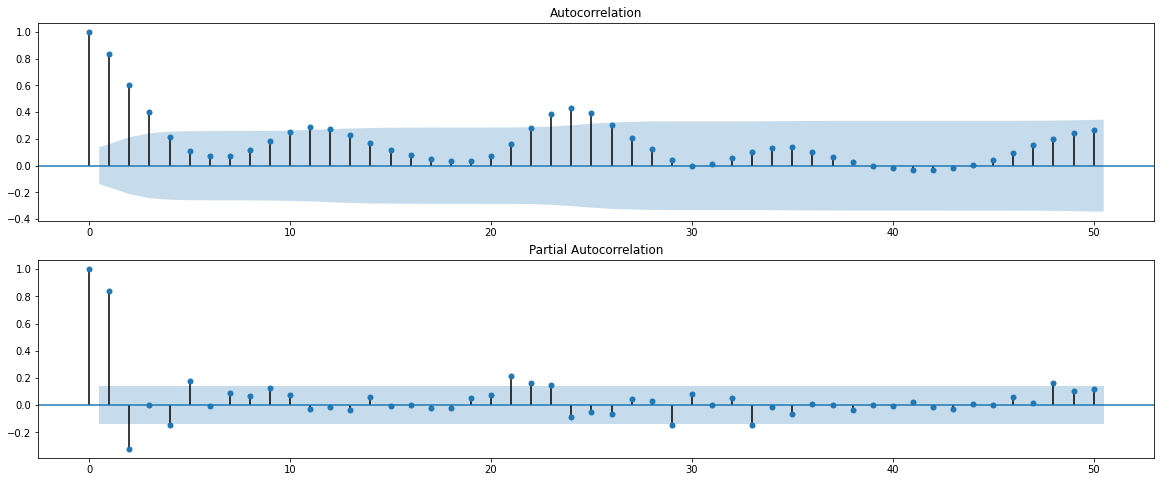

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(20,8))
plt.subplot(211)
plot_acf(series, lags=50, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=50, ax=plt.gca())
plt.show()

## Fitting the ARIMA model using (p,d,q) = (3,1,1):

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)): 
  # predict
  model = ARIMA(history, order=(3,1,1))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=1158.246, Expected=1038.000
>Predicted=1277.257, Expected=1143.000
>Predicted=1323.930, Expected=1123.000
>Predicted=1249.149, Expected=1269.000
>Predicted=1414.393, Expected=1921.000
>Predicted=2088.913, Expected=1910.000
>Predicted=1818.837, Expected=1964.000
>Predicted=1861.487, Expected=2033.000
>Predicted=1926.890, Expected=1518.000
>Predicted=1336.610, Expected=1410.000
>Predicted=1410.541, Expected=1431.000
>Predicted=1503.028, Expected=1850.000
>Predicted=1962.219, Expected=2756.000
>Predicted=2823.026, Expected=4530.000
>Predicted=4693.627, Expected=5217.000
>Predicted=4775.367, Expected=4676.000
>Predicted=3668.178, Expected=4705.000
>Predicted=4253.429, Expected=2609.000
>Predicted=1388.078, Expected=1477.000
>Predicted=767.527, Expected=1300.000
>Predicted=1345.196, Expected=1288.000
>Predicted=1521.360, Expected=1320.000
>Predicted=1578.730, Expected=1640.000
>Predicted=1949.191, Expected=2288.000
>Predicted=2604.936, Expected=2981.000
>Predicted=3164.817, Expec

## Hyper parameter tuning to find the best (p,d,q) values:

In [ ]:
import warnings
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = range(0,5)
d_values = range(0,2)
q_values = range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1643.207
ARIMA(0, 0, 1) RMSE=1051.565
ARIMA(0, 1, 0) RMSE=927.432
ARIMA(0, 1, 1) RMSE=921.728
ARIMA(0, 1, 2) RMSE=983.365
ARIMA(1, 0, 0) RMSE=927.817
ARIMA(1, 0, 1) RMSE=917.461
ARIMA(1, 0, 2) RMSE=955.266
ARIMA(1, 1, 0) RMSE=958.505
ARIMA(1, 1, 1) RMSE=979.788
ARIMA(2, 0, 0) RMSE=923.024
ARIMA(2, 0, 1) RMSE=958.208
ARIMA(2, 1, 0) RMSE=969.962
ARIMA(3, 0, 0) RMSE=937.448
ARIMA(3, 1, 0) RMSE=990.181
ARIMA(3, 1, 1) RMSE=969.031
ARIMA(4, 0, 0) RMSE=938.818
ARIMA(4, 0, 1) RMSE=913.528
ARIMA(4, 1, 0) RMSE=956.340
ARIMA(4, 1, 1) RMSE=936.871
Best ARIMA(4, 0, 1) RMSE=913.528


ARIMA(4,0,1) gives us the better RMSE value. So, let's take that for further steps.

## Train the ARIMA model using (4,0,1) and analysing the residual errors that we got:

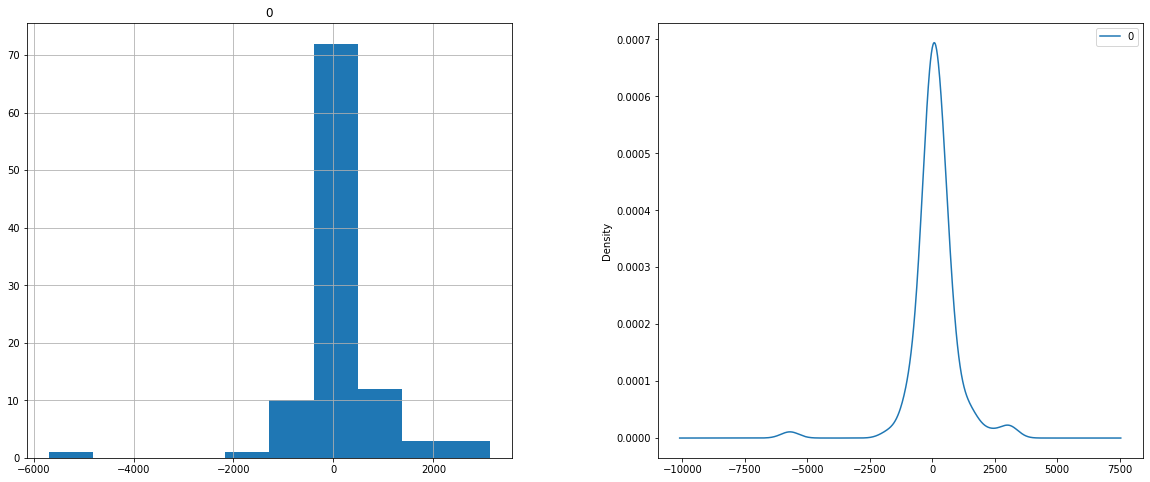

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(4,0,1))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)

plt.figure(figsize=(20,8))
plt.subplot(121)
residuals.hist(ax=plt.gca())
plt.subplot(122)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

The mean of the residual errors stays at "0". So, there is no necessary in addition or subraction of bias.

## ACF and PACF of residual errors:

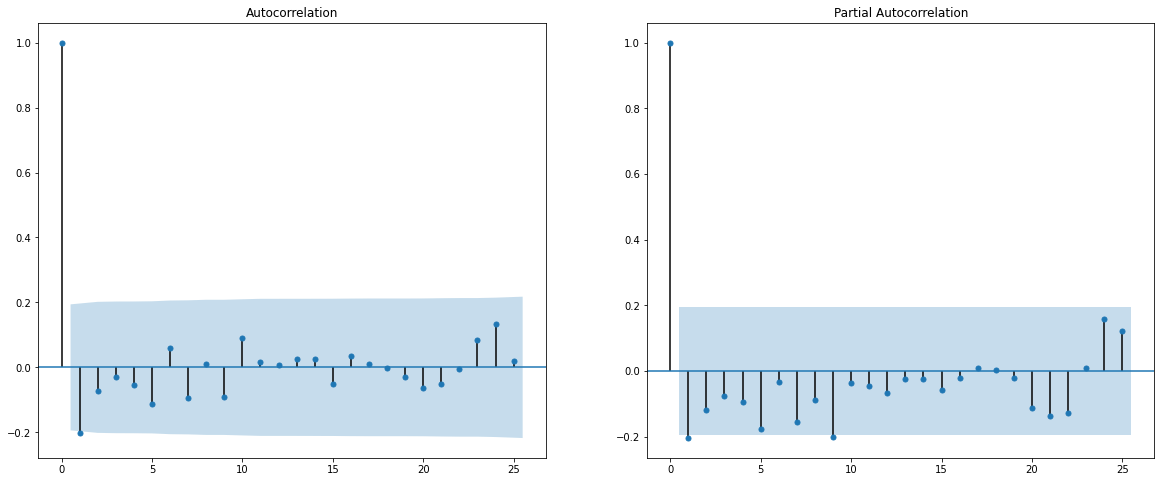

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plot_acf(residuals, lags=25, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals, lags=25, ax=plt.gca())
plt.show()

## Transforming the dataset using boxcox and finding the best lambda value:

Lambda: -0.211850


<Figure size 432x288 with 0 Axes>

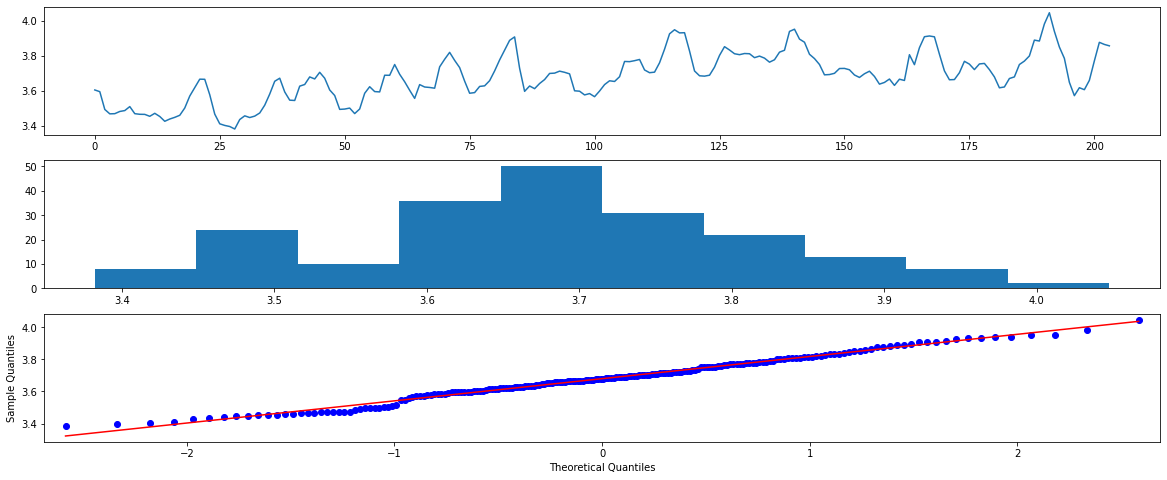

In [ ]:
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot
X = series.values
transformed, lam = boxcox(X)
print('Lambda: %f' % lam)
plt.figure(1)
plt.figure(figsize=(20,8))
# line plot
plt.subplot(311)
plt.plot(transformed)
# histogram
plt.subplot(312)
plt.hist(transformed)
# q-q plot
plt.subplot(313)
qqplot(transformed, line='r', ax=plt.gca())
plt.show()

Best lambda value = -0.211850

## Creating a function to inverse the tranformation that was made:

In [ ]:
from math import log
from math import exp
# invert box-cox transform
def boxcox_inverse(value, lam):
  if lam == 0:
    return exp(value)
  return exp(log(lam * value + 1) / lam)

## Training the ARIMA model with the transformed data as an input:

In [ ]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # transform
  transformed, lam = boxcox(history)
  if lam < -5:
    transformed, lam = history, 1
  # predict
  model = ARIMA(transformed, order=(4,0,1))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  # invert transformed prediction
  yhat = boxcox_inverse(yhat, lam)
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=955.786, Expected=1038.000
>Predicted=1094.019, Expected=1143.000
>Predicted=1180.369, Expected=1123.000
>Predicted=1122.297, Expected=1269.000
>Predicted=1359.757, Expected=1921.000
>Predicted=2137.157, Expected=1910.000
>Predicted=1812.540, Expected=1964.000
>Predicted=2017.631, Expected=2033.000
>Predicted=2113.386, Expected=1518.000
>Predicted=1379.118, Expected=1410.000
>Predicted=1498.922, Expected=1431.000
>Predicted=1495.637, Expected=1850.000
>Predicted=2017.157, Expected=2756.000
>Predicted=3023.416, Expected=4530.000
>Predicted=4830.463, Expected=5217.000
>Predicted=4933.085, Expected=4676.000
>Predicted=3778.148, Expected=4705.000
>Predicted=4331.685, Expected=2609.000
>Predicted=1241.595, Expected=1477.000
>Predicted=850.541, Expected=1300.000
>Predicted=926.995, Expected=1288.000
>Predicted=1385.111, Expected=1320.000
>Predicted=1193.582, Expected=1640.000
>Predicted=1842.810, Expected=2288.000
>Predicted=2291.230, Expected=2981.000
>Predicted=3149.742, Expecte

## Saving the model and lambda value for further use:

In [ ]:
X = series.values
X = X.astype('float32')
for i in range(len(X)):
  # transform
  transformed, lam = boxcox(X)
  if lam < -5:
    transformed, lam = X, 1
# fit model
model = ARIMA(transformed, order=(4,0,1))
model_fit = model.fit(disp=0)
# save model
model_fit.save('model.pkl')
np.save('model_lambda.npy', [lam])

## Loading the saved model and forecasted the next output:

In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults

model_fit = ARIMAResults.load('model.pkl')
lam = np.load('model_lambda.npy')
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
print('Predicted: %.3f' % yhat)

Predicted: 2957.058


## Finally, checking the performance of the model by predicting the outcomes of validation data that was set aside initially:

In [ ]:
dataset = pd.read_csv('onion_dataset_final.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
validation = pd.read_csv('onion_validation.csv', header=None, index_col=0, parse_dates=True,
squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
lam = np.load('model_lambda.npy')
# make first prediction
predictions = list()
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
  # transform
  transformed, lam = boxcox(history)
  if lam < -5:
    transformed, lam = history, 1
  # predict
  model = ARIMA(transformed, order=(4,0,1))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  # invert transformed prediction
  yhat = boxcox_inverse(yhat, lam)
  predictions.append(yhat)
  # observation
  obs = y[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2957.058, Expected=2976.000
>Predicted=2432.245, Expected=4211.000
>Predicted=4192.713, Expected=3300.000
>Predicted=2467.433, Expected=1100.000
>Predicted=802.992, Expected=1150.000
RMSE: 1091.014


RMSE value for the validation data is 1091.014

## Expected vs Predicted:

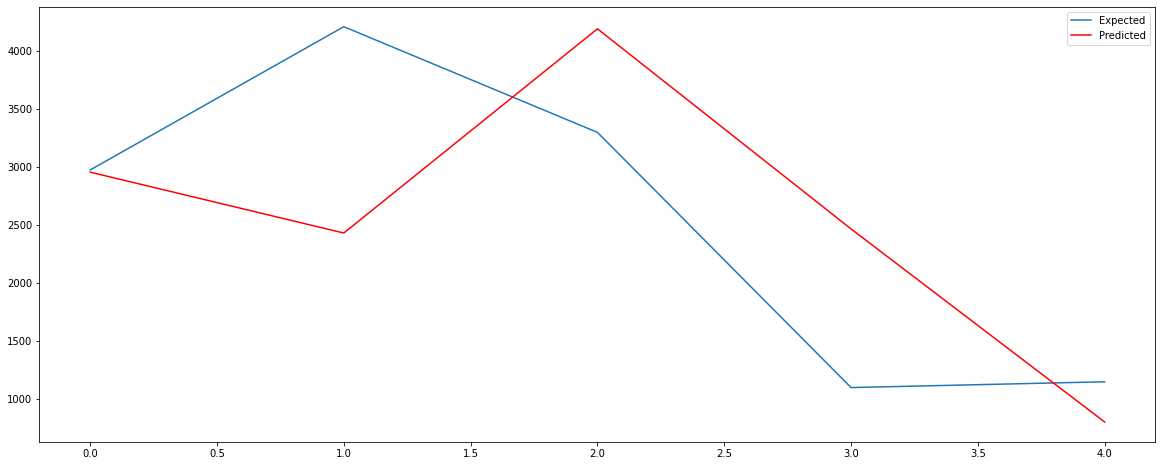

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y)
plt.plot(predictions, color='red')
plt.legend(['Expected','Predicted'])
plt.show()